# Iris species 
## Bonus Task for Ten Days of Coding

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression  
from sklearn import svm 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep = "," , 
                 header = None, names  = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"], index_col=None)

In [3]:
display(df.head())
#Distribution of each variable in dataset
display(df.describe())

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='PetalWidth', ylabel='PetalLength'>

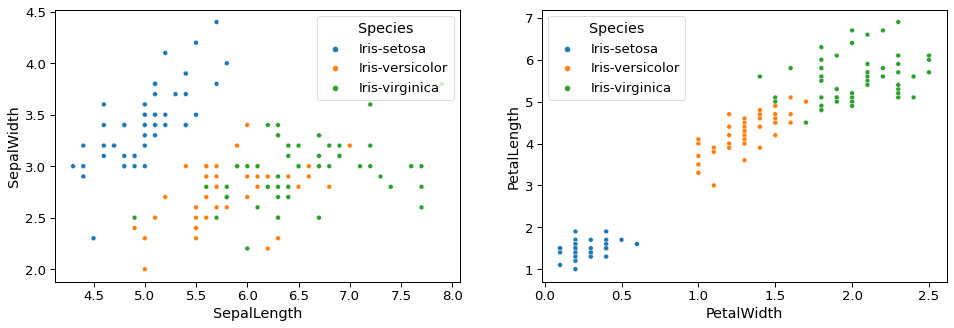

In [4]:
#Plotting bivariate plots to get insights of our taget variable
sns.set_context('paper', font_scale = 1.5)
fig, ax =plt.subplots(1,2)
fig.set_size_inches(16,5)
sns.scatterplot(x= 'SepalLength', y = 'SepalWidth', data = df, hue = 'Species',ax =ax[0])
sns.scatterplot(x= 'PetalWidth', y = 'PetalLength', data = df, hue = 'Species',ax =ax[1])

## These scatter plots show a very distinct Linear separation between the species Iris Setosa and the other two species named Iris Versicolor and Iris Virginica.

<AxesSubplot:>

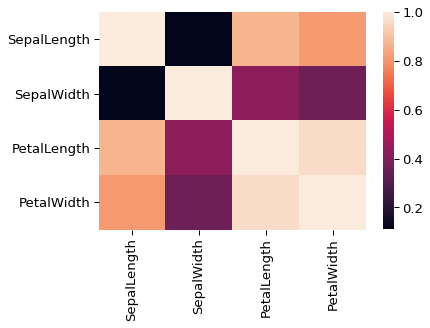

In [5]:
corr = abs(df.corr())
sns.heatmap(corr)

In [6]:
#Making a different dataset for the target variable
y = df.Species
Y = y.copy()

In [7]:
df.drop('Species', axis=1, inplace=True)

In [8]:
Y.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
#Converting categories to numeircal data for implementation of a models
Y.replace({"Iris-setosa":0,"Iris-versicolor":1, "Iris-virginica":2}, inplace = True);

## Iris-Setosa = 0
## Iris-Versicolor = 1
## Iris-Virginica = 2

In [10]:
print(df.head())
print(df.columns)

   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')


In [11]:
#Feature Scaling
#Unscaled features results in dominance of a particular feature/features having higher "weight" 
#and thus reduces the accuracy of the model on data the model is not tested on.
#Performing mean normalisation
for i in df.columns:
    df[i] = (df[i]-(df[i].mean()))/(df[i].std())

In [12]:
#Dataset with normalised values
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


In [13]:
display(df.head())
display(df.describe())

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-5.684342e-16,-6.158037e-16,1.894781e-16,-1.894781e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.863780e+00,-2.430844e+00,-1.563497e+00,-1.439627e+00
25%,-8.976739e-01,-5.858010e-01,-1.223442e+00,-1.177559e+00
50%,-5.233076e-02,-1.245404e-01,3.351431e-01,1.327811e-01
75%,6.722490e-01,5.673506e-01,7.602119e-01,7.879511e-01
max,2.483699e+00,3.104284e+00,1.780377e+00,1.705189e+00


In [14]:
xtrain, xtest, ytrain , ytest = train_test_split(df, Y, test_size = .1, random_state = 42)

# Decision Tree Classifier

In [15]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
prediction=model.predict(xtest)
print('Decision Tree accuracy is:' ,metrics.accuracy_score(prediction,ytest))

Decision Tree accuracy is: 1.0


Decision Tree gives 100% accuracy 

# OneVsAll Vectorized Logistic Regeression model
### Model implements vectorized Cost Function and Gradient descent and makes a OneVsAll Logistic Regeression model (3 categories) without the use of any libraries but Numpy and Pandas. 

### Converting datasets to matrices using Numpy as Vectorized implementation requires matrix operations. 

In [16]:
x = df.to_numpy()
y = Y.to_numpy()

In [17]:
numExamples = x.shape[0] 
numFeatures = x.shape[1]

In [18]:
#Adding unit bias
x = np.append(np.ones((numExamples,1)),x,axis=1)
x.shape

(150, 5)

In [19]:
xtrain, xtest, ytrain , ytest = train_test_split(x, y, test_size = .1, random_state = 42)

In [20]:
#Sigmoid Function which always return values between 0 and 1 
def  sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

In [21]:
#Cost function of Logistic Regression Model. Goal is to minimize this Cost function
def cost(theta, x, y):
    m = x.shape[0]
    predictions = sigmoid(np.matmul(x,theta))
    error = ((-y* np.log(predictions)) - ((1-y)*np.log(1-predictions)))
    cost = (1/m)*sum(error)
    return cost
#Gradient Descent
def grad(theta, x , y):
    m = x.shape[0]
    predictions = sigmoid(np.matmul(x,theta))
    grad = np.matmul(x.transpose(), (predictions - y)) / len(y)
    return grad

In [22]:
#Final thetas for each category (species) will be stored here
classifiers = np.zeros(shape=(3, numFeatures + 1))

In [23]:
#Getting optimum values of theta for each category by
#minimizing the Cost Function. 

#I have used the Scipy library to use its fmincg funtion which returns 
#the values of theta by optimizing the Cost funtion. 
for c in range(0,3):
    label = (ytrain == c).astype(int)
    lable = np.reshape(label, (label.shape[0],1))
    initial_theta = np.zeros((xtrain.shape[1]))
    initial_theta = np.reshape(initial_theta,(initial_theta.shape[0],1))
    classifiers[c, :] = opt.fmin_cg(cost, initial_theta, grad, (xtrain, label), disp=0)

In [24]:
#Making predictions on the entire dataset. 
classProbabilities = sigmoid(x @ classifiers.transpose())
#This will return us the category for whichever category the input variables returns 
#the highest probability  
predictions = classProbabilities.argmax(axis=1)
print("Accuracy of OnevsAll Vectorized Logistic Regression is:", str(100 * np.mean(predictions == y)) + "%")

Accuracy of OnevsAll Vectorized Logistic Regression is: 98.0%
